# trim_disconnected_blobs
an example for the use of porespy.filters.trim_disconnected_blobs

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage

Removes voxels that aren't connected to inlets.

Generate input image and variables:

--------------------------------------------------------------------------------
RSA: Adding spheres of size 25
Initial volume fraction: 0.0
Dilating foreground features by sphere radius
Number of spheres inserted: 14
Final volume fraction: 0.30193333333333333
--------------------------------------------------------------------------------
RSA: Adding spheres of size 3
Initial volume fraction: 0.30193333333333333
Dilating foreground features by sphere radius
Regenerating free_sites after 882 iterations
Regenerating free_sites after 1079 iterations
Regenerating free_sites after 1123 iterations
Number of spheres inserted: 1123
Final volume fraction: 0.6138777777777777
--------------------------------------------------------------------------------
RSA: Adding spheres of size 3
Initial volume fraction: 0.0
Dilating foreground features by sphere radius
Number of spheres inserted: 37
Final volume fraction: 0.010277777777777778


(-0.5, 299.5, 299.5, -0.5)

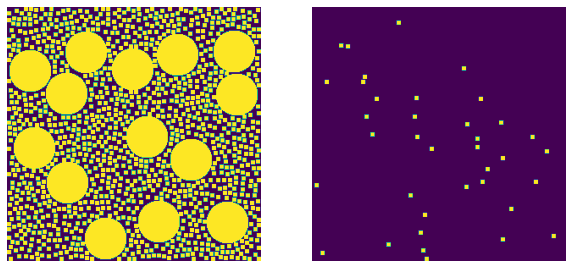

In [2]:
im = np.zeros([300, 300])
im = ps.generators.RSA(im, radius=25, volume_fraction=0.3)
im = ps.generators.RSA(im, radius=3, volume_fraction=0.7)
inlets = np.zeros([300, 300])
inlets  = ps.generators.RSA(inlets, radius=3, volume_fraction=0.01)
strel = None

fig, ax = plt.subplots(1, 2, figsize=[10, 10]);
ax[0].imshow(im);
ax[0].axis(False)
ax[1].imshow(inlets);
ax[1].axis(False)

Apply filters:

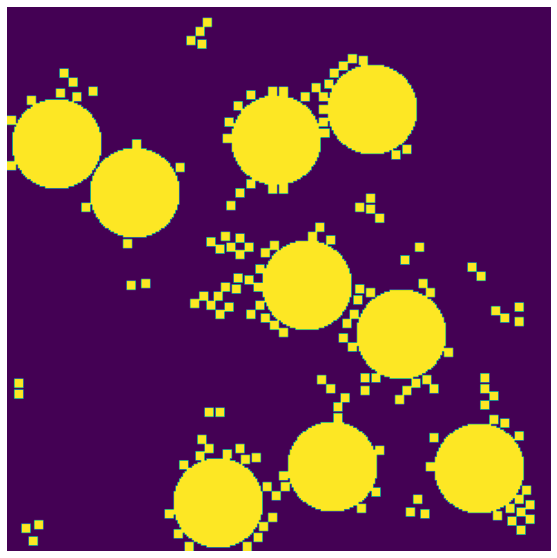

In [3]:
x = ps.filters.trim_disconnected_blobs(im, inlets, strel)
plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(x)